In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [120]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [121]:
data.index = data['RowNumber']
data.drop(['RowNumber'],axis=1,inplace=True)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [123]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [124]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA PREPARATION AND CLEANING

In [127]:
data.dropna()
X = data.iloc[:,2:12]
y = data.iloc[:,12]

In [128]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [129]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [130]:
Gender = pd.get_dummies(X['Gender'])
#Gender.head()
X.drop(['Gender'],axis=1,inplace=True)
X = pd.concat([X,Gender],axis=1)
X.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
RowNumber,,,,,,,,,,,
1,619,France,42,2,0.00,1,1,1,101348.88,1,0
2,608,Spain,41,1,83807.86,1,0,1,112542.58,1,0
3,502,France,42,8,159660.80,3,1,0,113931.57,1,0
4,699,France,39,1,0.00,2,0,0,93826.63,1,0
5,850,Spain,43,2,125510.82,1,1,1,79084.10,1,0


In [131]:
Geography = pd.get_dummies(X['Geography'])
#Geography.head()
X.drop(['Geography'],axis=1,inplace=True)
X = pd.concat([X,Geography],axis=1)

# Exploratory Data Analysis

In [132]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [134]:
X.describe(include='all')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.454300,0.545700,0.501400,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.497932,0.497932,0.500023,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Female             10000 non-null uint8
Male               10000 non-null uint8
France             10000 non-null uint8
Germany            10000 non-null uint8
Spain              10000 non-null uint8
dtypes: float64(2), int64(6), uint8(5)
memory usage: 752.0 KB


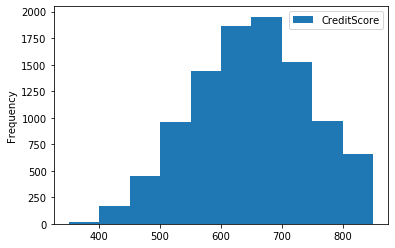

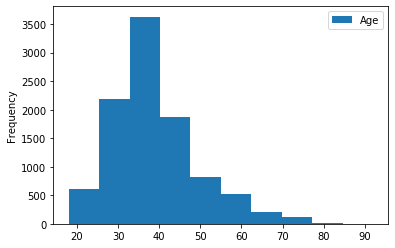

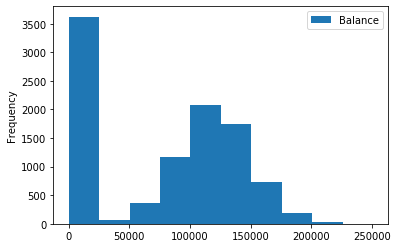

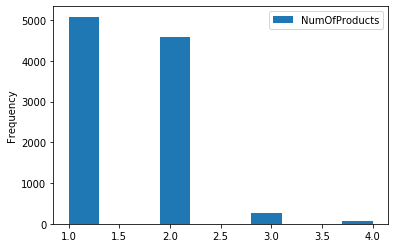

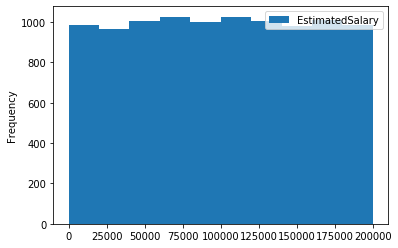

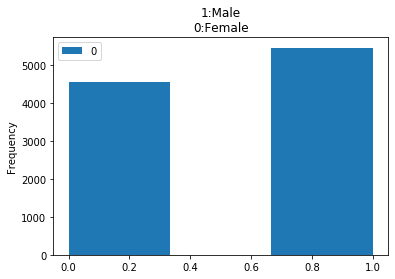

In [175]:
CreditScore = pd.DataFrame(data.CreditScore)
Age = pd.DataFrame(data.Age)
Balance = pd.DataFrame(data.Balance)
NumOfProducts = pd.DataFrame(data.NumOfProducts)
EstimatedSalary = pd.DataFrame(data.EstimatedSalary)
Gender = pd.DataFrame([1 if i=="Male" else 0 for i in data.Gender])



CreditScore.plot.hist()
Age.plot.hist()
Balance.plot.hist()
NumOfProducts.plot.hist()
EstimatedSalary.plot.hist()
Gender.plot.hist(title="1:Male\n0:Female",bins=3)

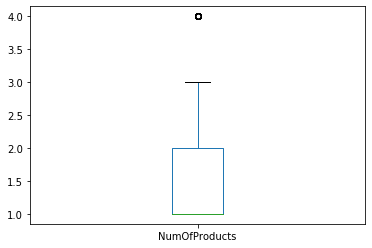

In [176]:
NumOfProducts.plot.box()

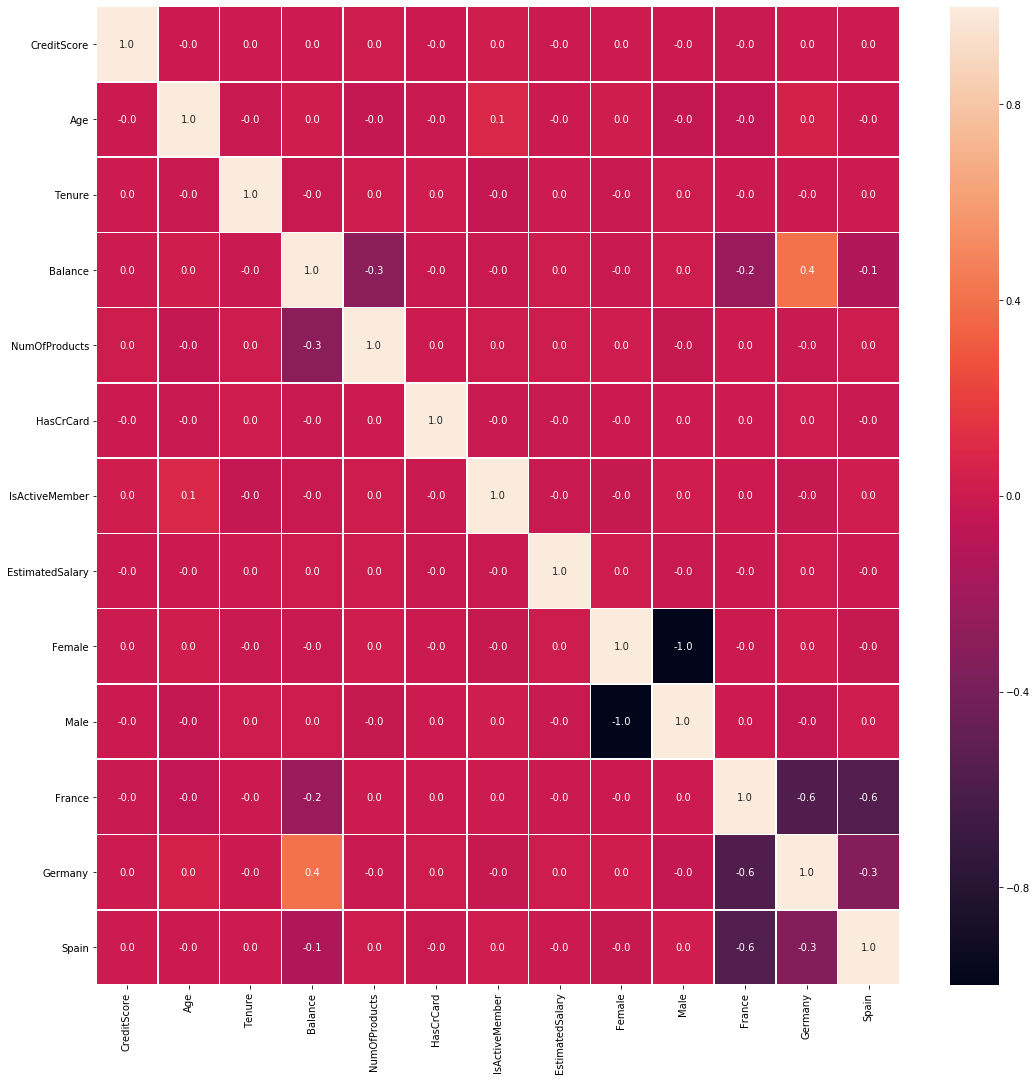

In [178]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [15]:
CountryGroup = data.groupby('Geography')
CountryGroup.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [16]:
Country_data_avg = CountryGroup.mean()
Country_data_count = CountryGroup.count()

In [17]:
Country_data_avg

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,
France,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [18]:
Country_data_count

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


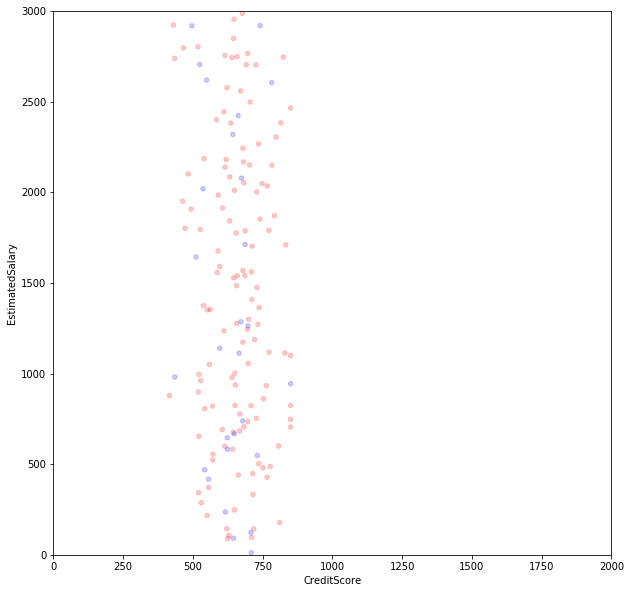

In [19]:
from sklearn.preprocessing import LabelEncoder
dataframe_y = pd.DataFrame(y)
le = LabelEncoder()
encoder = dataframe_y.apply(le.fit_transform)
color = []
for l in encoder.values:
    if l == 0:
        color.append("red")
    else:
        color.append("blue")            

plt.figure(figsize=(10,10))
plt.scatter(data['CreditScore'],data['EstimatedSalary'], color=color, marker='o', alpha=0.2,s=20)
axes = plt.gca()
axes.set_xlim([0,2000])
axes.set_ylim([0,3000])
plt.xlabel('CreditScore')
plt.ylabel('EstimatedSalary')

plt.show()

# MODEL BUILDING

Logistic Regression,Naive Bayes, SVM,KNN,RandomForest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=0)

sc = StandardScaler()#if i dont use scandart Scaler my accuracy willl drop
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

accuracy score of Logistic regression is :81.35
Logistic Regression


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


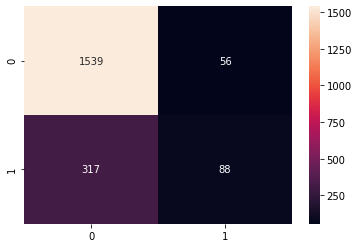

Accuracy : 0.8135
True positive: 88
True negative: 1539
False positive: 56
False negative: 317


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

LR = LogisticRegression()
LR.fit(x_train,y_train)

LR_pred = LR.predict(x_test)
score_LR = accuracy_score(y_test,LR_pred)*100
print("accuracy score of Logistic regression is :{}".format(score_LR))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, LR_pred)
print("Logistic Regression")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(y_test, LR_pred).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))


accuracy score of SVM is :86.4
Support Vector Machine


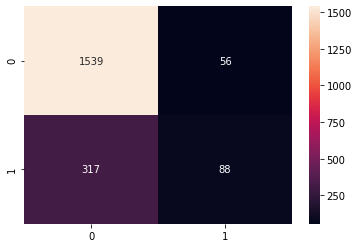

Accuracy : 0.8135
True positive: 165
True negative: 1563
False positive: 32
False negative: 240


In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

SVM = svm.SVC()
SVM.fit(x_train,y_train)

SVM_pred = SVM.predict(x_test)
score_SVM = accuracy_score(y_test,SVM_pred)*100
print("accuracy score of SVM is :{}".format(score_SVM))


cm = confusion_matrix(y_test, LR_pred)
print("Support Vector Machine")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(y_test, SVM_pred).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))

I also Use PARAMETER TUNING in this Model
(After I represent KNN Model)

In [23]:
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

scores = []

#I used parameter tuning EXTRA in KNN
for neighbor in range(10):
    KNN = KNeighborsClassifier(n_neighbors = neighbor+1, metric = 'minkowski')
    KNN.fit(x_train, y_train)

    KNN_pred = KNN.predict(x_test)
    score_KNN = accuracy_score(y_test,KNN_pred)*100
    print("accuracy score of KNN is :{} with neighbor {}".format(score_KNN,neighbor+1))
    scores.append([score_KNN,neighbor+1])



accuracy score of KNN is :79.60000000000001 with neighbor 1
accuracy score of KNN is :82.8 with neighbor 2
accuracy score of KNN is :81.65 with neighbor 3
accuracy score of KNN is :82.75 with neighbor 4
accuracy score of KNN is :83.25 with neighbor 5
accuracy score of KNN is :83.39999999999999 with neighbor 6
accuracy score of KNN is :82.89999999999999 with neighbor 7
accuracy score of KNN is :83.95 with neighbor 8
accuracy score of KNN is :83.7 with neighbor 9
accuracy score of KNN is :83.75 with neighbor 10


In [24]:
scores = sorted(scores,key=lambda l:l[0], reverse=True)
BestNeighbors = scores[0][1]

KNN = KNeighborsClassifier(n_neighbors = BestNeighbors, metric = 'minkowski')
KNN.fit(x_train, y_train)

KNN_pred = KNN.predict(x_test)
score_KNN = accuracy_score(y_test,KNN_pred)*100
print("accuracy score of Best KNN is :{} with neighbor {}".format(score_KNN,BestNeighbors))

accuracy score of Best KNN is :83.95 with neighbor 8


accuracy score of Naive Bayes is :81.25
Naive Bayes


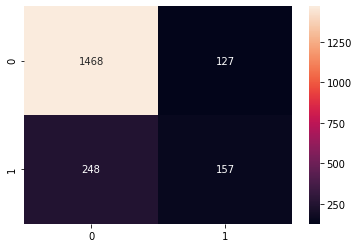

Accuracy : 0.8125
True positive: 157
True negative: 1468
False positive: 127
False negative: 248


In [25]:
from sklearn.naive_bayes  import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

NB = GaussianNB()
NB.fit(x_train,y_train)

NB_pred = NB.predict(x_test)
score_NB = accuracy_score(y_test,NB_pred)*100
print("accuracy score of Naive Bayes is :{}".format(score_NB))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, NB_pred)
print("Naive Bayes")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(y_test, NB_pred).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))

accuracy score of Random Forest is :86.9
Random Forest


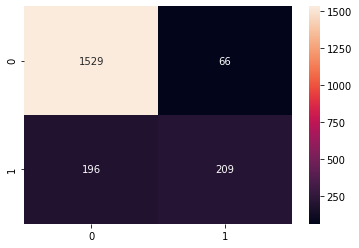

Accuracy : 0.869
True positive: 209
True negative: 1529
False positive: 66
False negative: 196


In [26]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=50) 
RFC.fit(x_train, y_train)
RFC_pred = RFC.predict(x_test)
score_RFC = accuracy_score(y_test,RFC_pred)*100
print("accuracy score of Random Forest is :{}".format(score_RFC))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, RFC_pred)
print("Random Forest")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(y_test, RFC_pred).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))


<h2>Comparative Performance Analysis</h2>

Accuracy, Recall, Precision, F1 Score, AUC Score

In [27]:
from sklearn import metrics

Model_Pred = [LR_pred,SVM_pred,NB_pred,RFC_pred,KNN_pred]
Model_Name = ["Logistic_Regression","SupportVectorMachines","NaiveBayes","RandomForest","KNN"]

for Pred,Name in zip(Model_Pred,Model_Name):
    print("\t\t{} Metrics".format(Name))
    print("---------------------------------------------")
    print("\n")
    print("Accuracy: " + str(metrics.accuracy_score(y_test,Pred)))
    print("Precision late: " + str(metrics.precision_score(y_test,Pred)))
    print("Precision early: " + str(metrics.precision_score(y_test,Pred,pos_label=0)))
    print("Recall: " + str(metrics.recall_score(y_test,Pred)))
    print("F1 score: " + str(metrics.f1_score(y_test,Pred)))
    print("AUC score: " + str(metrics.roc_auc_score(y_test,Pred)))
    print("\n")
    print(metrics.classification_report(y_test,Pred))
    print("\n\n")
    


		Logistic_Regression Metrics
---------------------------------------------


Accuracy: 0.8135
Precision late: 0.6111111111111112
Precision early: 0.8292025862068966
Recall: 0.21728395061728395
F1 score: 0.3205828779599272
AUC score: 0.5910871163744726


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.61      0.22      0.32       405

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.79      0.81      0.78      2000




		SupportVectorMachines Metrics
---------------------------------------------


Accuracy: 0.864
Precision late: 0.8375634517766497
Precision early: 0.8668885191347754
Recall: 0.4074074074074074
F1 score: 0.548172757475083
AUC score: 0.6936723557413212


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.84      0.41      0.55       40

<h2>Ensemble Learning</h2>


Our method, Hard voting with VotingClassifier, Soft voting with VotingClassifier

Ensemble


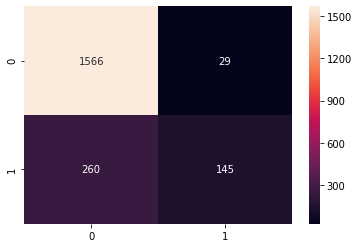

Accuracy : 0.8555


In [28]:
Ensamble_pred = LR_pred+SVM_pred+NB_pred+RFC_pred+KNN_pred
Ensamble_pred = [1 if (i >= 3) else 0 for i in Ensamble_pred]

cm = confusion_matrix(y_test, Ensamble_pred)
print("Ensemble")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ensemble Hard Vote


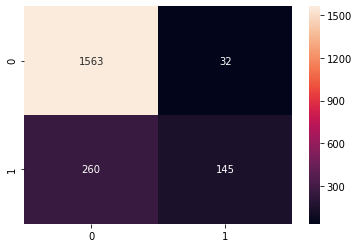

Accuracy : 0.854


In [29]:
from sklearn.ensemble import VotingClassifier

estimators=[('knn', KNN), ('rf', RFC), ('log_reg',LR),('gnb', NB),('svm',SVM)]

EC_hard = VotingClassifier(estimators=estimators,voting='hard')
EC_hard.fit(x_train, y_train)

EC_hard_pred = EC_hard.predict(x_test)
cm = confusion_matrix(y_test, EC_hard_pred)
print("Ensemble Hard Vote")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ensemble Soft Vote


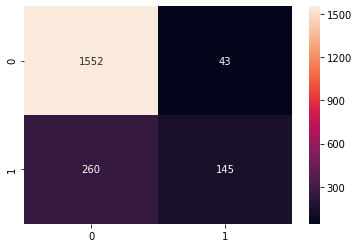

Accuracy : 0.8485


In [30]:
from sklearn.ensemble import VotingClassifier

estimators=[('knn', KNN), ('rf', RFC), ('log_reg',LR),('gnb', NB)]

EC_soft = VotingClassifier(estimators=estimators,voting='soft')
EC_soft.fit(x_train, y_train)

EC_soft_pred = EC_soft.predict(x_test)
cm = confusion_matrix(y_test, EC_soft_pred)
print("Ensemble Soft Vote")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

In [31]:
from sklearn import metrics

Ensamble_Model_Pred = [Ensamble_pred,EC_hard_pred,EC_soft_pred]
Ensamble_Model_Name = ["Our Method","Hard Vote","Soft Vote"]

for Pred,Name in zip(Ensamble_Model_Pred,Ensamble_Model_Name):
    print("\t\t{} Metrics".format(Name))
    print("---------------------------------------------")
    print("\n")
    print("Accuracy: " + str(metrics.accuracy_score(y_test,Pred)))
    print("Precision late: " + str(metrics.precision_score(y_test,Pred)))
    print("Precision early: " + str(metrics.precision_score(y_test,Pred,pos_label=0)))
    print("Recall: " + str(metrics.recall_score(y_test,Pred)))
    print("F1 score: " + str(metrics.f1_score(y_test,Pred)))
    print("AUC score: " + str(metrics.roc_auc_score(y_test,Pred)))
    print("\n")
    print(metrics.classification_report(y_test,Pred))
    print("\n\n")
    

		Our Method Metrics
---------------------------------------------


Accuracy: 0.8555
Precision late: 0.8333333333333334
Precision early: 0.8576122672508215
Recall: 0.35802469135802467
F1 score: 0.5008635578583764
AUC score: 0.6699214365881032


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1595
           1       0.83      0.36      0.50       405

    accuracy                           0.86      2000
   macro avg       0.85      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000




		Hard Vote Metrics
---------------------------------------------


Accuracy: 0.854
Precision late: 0.8192090395480226
Precision early: 0.857377948436643
Recall: 0.35802469135802467
F1 score: 0.49828178694158076
AUC score: 0.6689809977166299


              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1595
           1       0.82      0.36      0.50       405

    accuracy    

<h2>Parameter Tuning</h2>


Optimizing parameters using GridSearchCV for KNN and Random Forest

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
p = [{'n_neighbors':[i for i in range(3,30,2)], 'metric':['minkowski','manhattan','euclidean']}]


gs = GridSearchCV(estimator=KNN,
                  param_grid=p,
                  scoring='accuracy',
                  cv=10)
grid_search = gs.fit(x_train, y_train)
print("Best Estimator:\n")
print(grid_search.best_estimator_)
print("\nBest Parameters:\n")
print(grid_search.best_params_)
print("\nBest Score: " + str(grid_search.best_score_))

Best Estimator:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

Best Parameters:

{'metric': 'manhattan', 'n_neighbors': 11}

Best Score: 0.83075


In [34]:
p_rf = [{'n_estimators':[i for i in range(10,100,10)], 'criterion':['gini','entropy'] , 
                         'max_depth':[None,10,50,100,200]}]

gs = GridSearchCV(estimator=RFC,
                  param_grid=p_rf,
                  scoring='accuracy',
                  cv=10)
grid_search = gs.fit(x_train, y_train)
print("Best Estimator:\n")
print(grid_search.best_estimator_)
print("\nBest Parameters:\n")
print(grid_search.best_params_)
print("\nBest Score: " + str(grid_search.best_score_))

Best Estimator:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Best Parameters:

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 60}

Best Score: 0.86275


# CREATING DEEP LEARNING MODEL

In [35]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [37]:
InputDeep = np.asarray(X)
InputDeep

array([[619.,  42.,   2., ...,   1.,   0.,   0.],
       [608.,  41.,   1., ...,   0.,   0.,   1.],
       [502.,  42.,   8., ...,   1.,   0.,   0.],
       ...,
       [709.,  36.,   7., ...,   1.,   0.,   0.],
       [772.,  42.,   3., ...,   0.,   1.,   0.],
       [792.,  28.,   4., ...,   1.,   0.,   0.]])

In [49]:
y.head()

Y = pd.get_dummies(y)
Y.columns = ["Not_Exit","Exit"]

#Y = y
Y.head()

,Not_Exit,Exit
RowNumber,,
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0


In [50]:
label = np.asarray(Y)
label.shape

(10000, 2)

In [40]:
label

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [41]:
print(InputDeep.shape)
print(InputDeep.shape[1])

Inputshape = InputDeep.shape[1]

#InputDeep = InputDeep.astype(int)

(10000, 13)
13


In [112]:
from keras.layers import Input, Dense, Dropout,BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import LeakyReLU

input_layer = Input(shape=(Inputshape,))
x = Dense(units=128)(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Dense(units=64)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Dropout(rate=0.25)(x)

x = Dense(units=32)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

output_layer = Dense(units=label.shape[1], activation = 'softmax')(x)

DeepModel = Model(input_layer, output_layer)
DeepModel.summary()

opt = Adam(lr=0.0005)
DeepModel.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 13)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               1792      
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 64)                0         
__________

In [113]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

xtrain, xtest,ytrain,ytest = train_test_split(InputDeep,label,test_size=0.20, random_state=0)

sc = StandardScaler()#if i dont use scandart Scaler my accuracy willl drop
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

DeepModel.fit(xtrain,ytrain,batch_size=16,epochs=100,shuffle=True)

Epoch 1/100
8000/8000 [==============================] - 6s 800us/step - loss: 0.4880 - acc: 0.7767
Epoch 2/100
8000/8000 [==============================] - 2s 277us/step - loss: 0.4117 - acc: 0.8234
Epoch 3/100
8000/8000 [==============================] - 2s 267us/step - loss: 0.3953 - acc: 0.8310
Epoch 4/100
8000/8000 [==============================] - 2s 275us/step - loss: 0.3892 - acc: 0.8372
Epoch 5/100
8000/8000 [==============================] - 2s 277us/step - loss: 0.3797 - acc: 0.8414
Epoch 6/100
8000/8000 [==============================] - 2s 281us/step - loss: 0.3809 - acc: 0.8435
Epoch 7/100
8000/8000 [==============================] - 2s 280us/step - loss: 0.3757 - acc: 0.8459
Epoch 8/100
8000/8000 [==============================] - 2s 278us/step - loss: 0.3696 - acc: 0.8442
Epoch 9/100
8000/8000 [==============================] - 2s 293us/step - loss: 0.3741 - acc: 0.8455
Epoch 10/100
8000/8000 [==============================] - ETA: 0s - loss: 0.3716 - acc: 0.847 - 3s 3

8000/8000 [==============================] - 3s 313us/step - loss: 0.3371 - acc: 0.8619
Epoch 82/100
8000/8000 [==============================] - 3s 329us/step - loss: 0.3376 - acc: 0.8609
Epoch 83/100
8000/8000 [==============================] - 3s 324us/step - loss: 0.3351 - acc: 0.8606
Epoch 84/100
8000/8000 [==============================] - 3s 337us/step - loss: 0.3420 - acc: 0.8580
Epoch 85/100
8000/8000 [==============================] - 3s 336us/step - loss: 0.3364 - acc: 0.8631
Epoch 86/100
8000/8000 [==============================] - 3s 372us/step - loss: 0.3408 - acc: 0.8614
Epoch 87/100
8000/8000 [==============================] - 3s 370us/step - loss: 0.3385 - acc: 0.8635 1s - los
Epoch 88/100
8000/8000 [==============================] - 3s 352us/step - loss: 0.3367 - acc: 0.8612
Epoch 89/100
8000/8000 [==============================] - 3s 328us/step - loss: 0.3405 - acc: 0.8590
Epoch 90/100
8000/8000 [==============================] - 3s 322us/step - loss: 0.3376 - acc: 0

In [114]:
evaluating = DeepModel.evaluate(xtest, ytest)
Deep_pred = DeepModel.predict(xtest)

#Deep_pred = np.asarray([0 if i < 0.5 else 1 for i in Deep_pred])

CLASSES = np.asarray([0,1])
preds_single = CLASSES[np.argmax(Deep_pred, axis = 1)]
actual_single = CLASSES[np.argmax(ytest, axis = 1)]


2000/2000 [==============================] - 1s 532us/step


accuracy score of Deep Learning is :86.5
Deep Learning Model


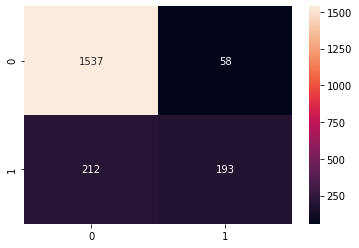

Accuracy : 0.865
True positive: 193
True negative: 1537
False positive: 58
False negative: 212


In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score_Deep = accuracy_score(actual_single,preds_single)*100
print("accuracy score of Deep Learning is :{}".format(score_Deep))

cm = confusion_matrix(actual_single, preds_single)
print("Deep Learning Model")
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()
print("Accuracy : " + str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))

tn, fp, fn, tp = confusion_matrix(actual_single, preds_single).ravel()
print("True positive: " + str(tp))
print("True negative: " + str(tn))
print("False positive: " + str(fp))
print("False negative: " + str(fn))

<h2> Conclusion </h2>


I have tried to Create a model to predict if this person will exit the bank or not. It vas a categorization problem and i have binary label.Firs I did to extract data and create train and test label. I have a datasets with 10000 varibales and use 80 oercent of them to train model. I use pandas.getDummies for country and Gender to make our model more accuracy. After I split the data i use standart scaler for both train and test data.
After I prepare data I used 5 model:Logistic Regression,Naive Bayes, SVM,KNN,RandomForest. in Knn model İ also use parameter tuning and test model with 10 different neighbors. according to result best neighbor for KNN is 8.
If we compare all Models performance wee see
<br>NaiveBayes Metrics has accuracy :81.2%</br>
<br>RandomForest Metrics has accuracy :86.6%</br>
<br>KNN Metrics has accuracy :83.9%</br>
<br>SupportVectorMachines Metrics has accuracy: 86.4%</br>
<br>Logistic_Regression Metrics has accuracy: 81.3%</br>
<br>Even all of them are better for categorization we can see</br> RandomForest and SVM are ver close each other and have best perform for categorization this problem.Unfortunately NaiveBayes and Logistic_Regression has good result compare the other result(of course their accuracies are not bad). 
As we can see soft or hard classifiers, hard classifiers have slightly better performance than soft classifiers<br></br>
Finaly I generate Deep Leraning model and in order to increase his accuracy i used BatchNormalization and Dropout layer. As a result , this model has a great performance compare to other models, almost 87%